In [60]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [61]:
data=pd.read_csv('Data-analysis\Kaggle_dataset.csv')
print(data.head())

   Years  Total Number of Road Accidents (in numbers)  \
0   1970                                       114100   
1   1980                                       153200   
2   1990                                       282600   
3   1994                                       325864   
4   1995                                       351999   

   Total Number of Persons Killed (in numbers)  Ratio of Accidents to Deaths  
0                                        14500                      0.127082  
1                                        24000                      0.156658  
2                                        54100                      0.191437  
3                                        64463                      0.197822  
4                                        70781                      0.201083  


In [62]:
features=[]
for i in data:
    features.append(i)
print(features)

['Years', 'Total Number of Road Accidents (in numbers)', 'Total Number of Persons Killed (in numbers)', 'Ratio of Accidents to Deaths']


In [63]:
data.describe()

,Years,Total Number of Road Accidents (in numbers),Total Number of Persons Killed (in numbers),Ratio of Accidents to Deaths
count,27.000000,27.000000,27.000000,27.000000
mean,2002.666667,409124.740741,98610.037037,0.231689
std,10.891069,99090.505944,37324.713290,0.047012
min,1970.000000,114100.000000,14500.000000,0.127082
25%,1997.500000,379344.500000,77944.000000,0.201365
50%,2004.000000,429910.000000,92618.000000,0.215436
75%,2010.500000,485544.000000,136042.500000,0.275583
max,2017.000000,501423.000000,150785.000000,0.318154


In [64]:

# Y=data[['Total Number of Road Accidents (in numbers)', 'Total Number of Persons Killed (in numbers)']]
# X=data[['Years']]

X = data[['Years']]
y = data['Ratio of Accidents to Deaths']

Linear Regression

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the mean squared error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate the R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the metrics
print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing R^2 Score: {test_r2}")



Training Mean Squared Error: 409548450.7718067
Testing Mean Squared Error: 278485985.2825336
Training R^2 Score: 0.9393424428867384
Testing R^2 Score: 0.8890545301719123


Polynomial Regression with degree 4

Training Mean Squared Error: 6.655780558587221e-05
Testing Mean Squared Error: 0.00015412902334259378
Training R^2 Score: 0.970086503026898
Testing R^2 Score: 0.9013760336412205


c:\Users\pavan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


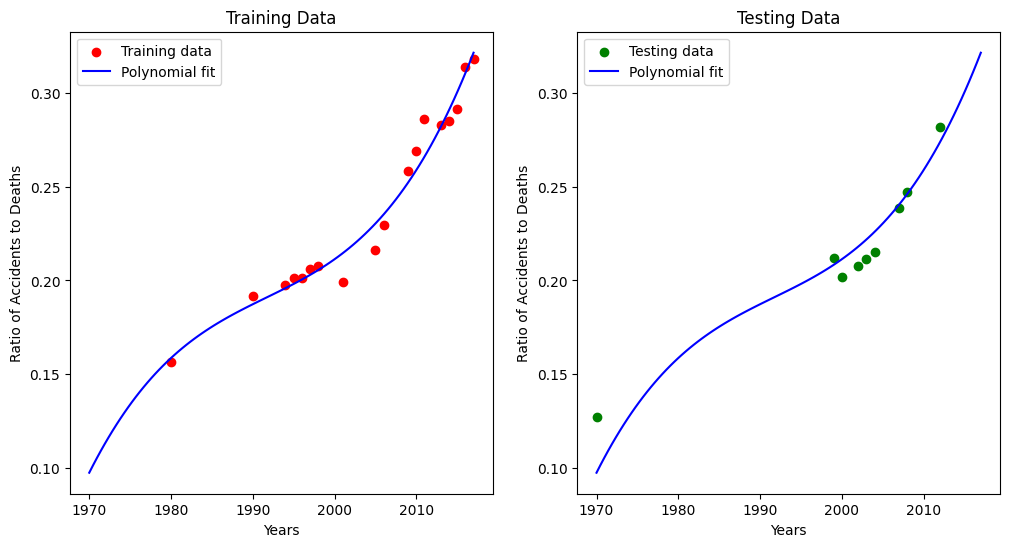

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Polynomial features
degree = 4  # You can experiment with different degrees
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Polynomial Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict values
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing R^2 Score: {test_r2}")

# Plotting
x_fit = np.linspace(min(X['Years']), max(X['Years']), 100).reshape(-1, 1)
X_fit_poly = poly.transform(x_fit)
y_fit = model.predict(X_fit_poly)

plt.figure(figsize=(12, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.plot(x_fit, y_fit, color='blue', label='Polynomial fit')
plt.xlabel('Years')
plt.ylabel('Ratio of Accidents to Deaths')
plt.title('Training Data')
plt.legend()

# Plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(x_fit, y_fit, color='blue', label='Polynomial fit')
plt.xlabel('Years')
plt.ylabel('Ratio of Accidents to Deaths')
plt.title('Testing Data')
plt.legend()

plt.show()

Ridge Regression Model with degree 4

c:\Users\pavan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.2904e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\pavan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Training Mean Squared Error: 6.883062954046464e-05
Testing Mean Squared Error: 7.116493377527664e-05
Training R^2 Score: 0.9690650133325244
Testing R^2 Score: 0.9544630343956896


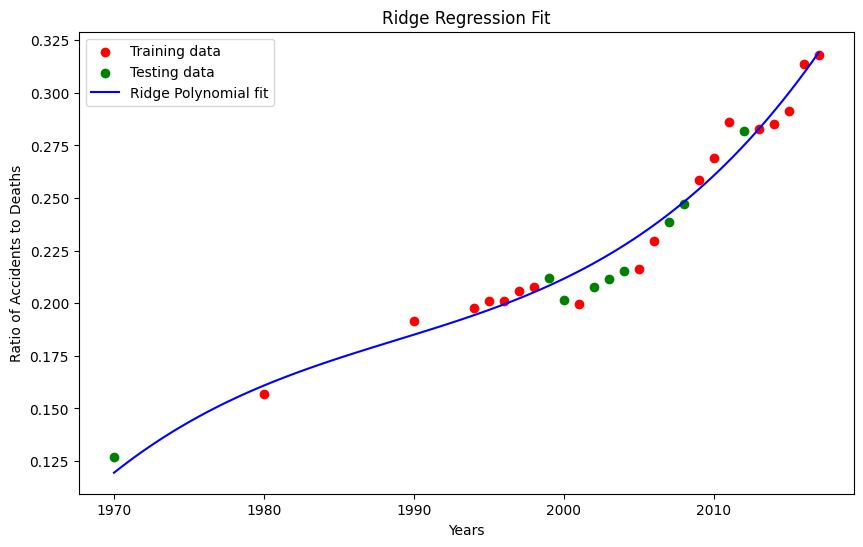

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Years']]
y = df['Ratio of Accidents to Deaths']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define polynomial features
degree = 4  # You can experiment with different degrees
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create Ridge Regression model
alpha = 1.0  # Regularization strength, you can tune this parameter
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_train_pred = ridge_model.predict(X_train_poly)
y_test_pred = ridge_model.predict(X_test_poly)

# Performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing R^2 Score: {test_r2}")

# Plotting
x_fit = np.linspace(min(X['Years']), max(X['Years']), 100).reshape(-1, 1)
X_fit_poly = poly.transform(x_fit)
y_fit = ridge_model.predict(X_fit_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(x_fit, y_fit, color='blue', label='Ridge Polynomial fit')
plt.xlabel('Years')
plt.ylabel('Ratio of Accidents to Deaths')
plt.title('Ridge Regression Fit')
plt.legend()
plt.show()

c:\Users\pavan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.832e-03, tolerance: 4.005e-06
  model = cd_fast.enet_coordinate_descent(
c:\Users\pavan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Training Mean Squared Error: 0.00020295196770297641
Testing Mean Squared Error: 0.000429030347048351
Training R^2 Score: 0.9087860091220206
Testing R^2 Score: 0.7254723763470519


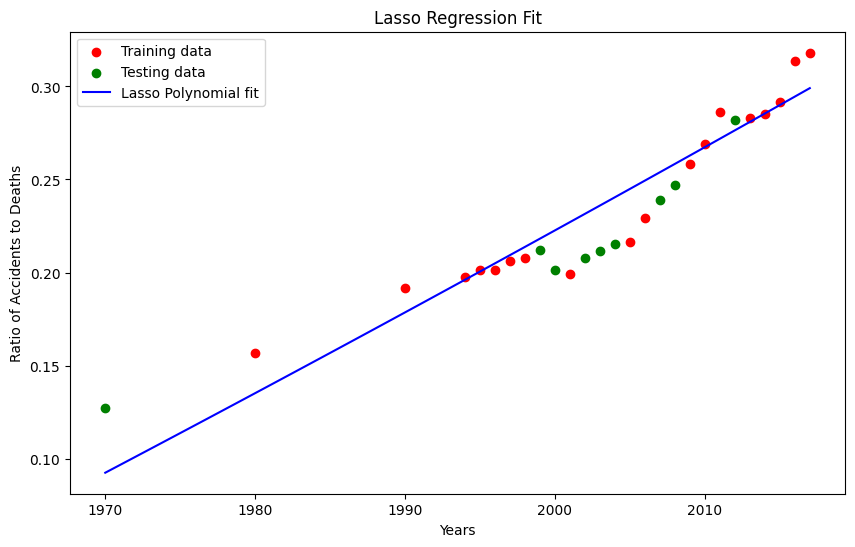

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Years']]
y = df['Ratio of Accidents to Deaths']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define polynomial features
degree = 4  # You can experiment with different degrees
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create Lasso Regression model
alpha = 1.0  # Regularization strength, you can tune this parameter
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_train_pred = lasso_model.predict(X_train_poly)
y_test_pred = lasso_model.predict(X_test_poly)

# Performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing R^2 Score: {test_r2}")

# Plotting
x_fit = np.linspace(min(X['Years']), max(X['Years']), 100).reshape(-1, 1)
X_fit_poly = poly.transform(x_fit)
y_fit = lasso_model.predict(X_fit_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(x_fit, y_fit, color='blue', label='Lasso Polynomial fit')
plt.xlabel('Years')
plt.ylabel('Ratio of Accidents to Deaths')
plt.title('Lasso Regression Fit')
plt.legend()
plt.show()